# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project
**Warning: This notebook was AI-generated and has not been fully verified. Use caution when interpreting code or results.**

## Overview

This notebook explores Dandiset `000690` (version `0.250326.0015`) from the DANDI archive.  
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

We will cover:
- Loading dandiset metadata via the DANDI API  
- Listing assets and selecting an NWB file  
- Loading NWB file metadata and summarizing its structure  
- Loading and visualizing example data (eye tracking, running speed)  
- Advanced visualization combining eye position and running speed  
- Summary and future directions  

## Required Packages
(Assumes these are already installed)

In [1]:
import warnings
warnings.filterwarnings('ignore')

from itertools import islice
from dandi.dandiapi import DandiAPIClient
import remfile
import h5py
from pynwb import NWBHDF5IO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

## Load Dandiset Metadata

In [2]:
client = DandiAPIClient()
dandiset = client.get_dandiset("000690", "0.250326.0015")
metadata = dandiset.get_raw_metadata()

print(f"Dandiset name: {metadata.get('name')}")
print(f"Dandiset URL: {metadata.get('url')}")
print("\nFirst 5 assets:")
assets = dandiset.get_assets()
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb (ID: b0ea16d5-42eb-4b56-87cc-7d7b7efab4db)
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb (ID: e0ad1921-75f1-43ed-aa86-8e1a45a9f49d)
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb (ID: 97712120-158d-492a-ae21-61515335bc18)
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb (ID: de12ccea-83a7-4d7f-937c-4c02e4d3bf44)
- sub-692077/sub-692077_ses-1300222049.nwb (ID: 8ae65111-a130-47fc-a108-55e695374739)


## Load NWB File

Selecting the first NWB file for demonstration:
`sub-692072/sub-692072_ses-1298465622.nwb`

In [3]:
remote_url = "https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/"
remote_file = remfile.File(remote_url)
h5_file = h5py.File(remote_file, mode='r')
io = NWBHDF5IO(file=h5_file)
nwb = io.read()

print(f"Loaded NWB session identifier: {nwb.identifier}")

Loaded NWB session identifier: 1298465622


## NWB File Structure

- **Acquisition**: data directly recorded in the session  
- **Processing**: processed timeseries (e.g., running speed, stimulus times)  
- **Intervals**: time interval tables for stimulus presentations  
- **Electrode groups** / **Devices**  
- **Units**: sorted spike times  
- **Subject** metadata  

In [4]:
print("Acquisition keys:", list(nwb.acquisition.keys()))
print("Processing modules:", list(nwb.processing.keys()))
print("Intervals:", list(nwb.intervals.keys()))
print("Electrode groups:", list(nwb.electrode_groups.keys()))
print("Devices:", list(nwb.devices.keys()))
print("Units columns:", nwb.units.colnames)
print("Subject:", {k: getattr(nwb.subject, k) for k in ['subject_id','age','sex','species']})

Acquisition keys: ['EyeTracking', 'raw_running_wheel_rotation', 'running_wheel_signal_voltage', 'running_wheel_supply_voltage']
Processing modules: ['running', 'stimulus']
Intervals: ['Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'Disk_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'GreenSAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'Ring_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'SAC_Wd15_Vel2_Bndry1_Cntst1_loop_presentations', 'SAC_Wd15_Vel2_Bndry2_Cntst0_loop_presentations', 'SAC_Wd15_Vel2_Bndry2_Cntst0_oneway_presentations', 'SAC_Wd15_Vel2_Bndry3_Cntst0_loop_presentations', 'SAC_Wd15_Vel8_Bndry1_Cntst0_loop_presentations', 'SAC_Wd45_Vel2_Bndry1_Cntst0_loop_presentations', 'UD_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'acurl_Wd15_Vel2_Bndry1_Cntst0_oneway_presentations', 'curl_Wd15_Vel2_Bndry1_Cntst0_oneway_presentations', 'invalid_times', 'natmovie_CricketsOnARock_540x960Full_584x460Active_presentations', 'natmovie_

NWB file link on NeuroSift:  
[Open in NeuroSift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=0.250326.0015)

## Visualize Eye Tracking Data

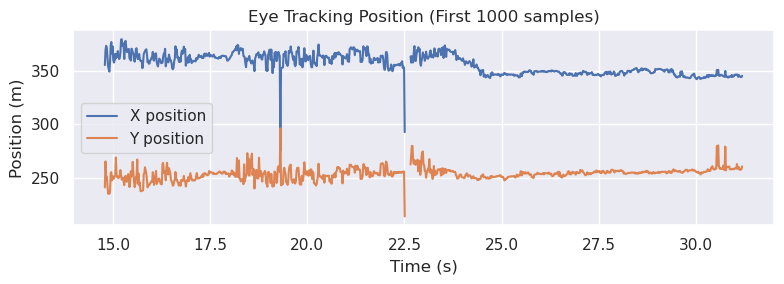

In [5]:
# Load a subset of eye tracking data to avoid large downloads
eye = nwb.acquisition['EyeTracking'].spatial_series['eye_tracking']
timestamps_eye = eye.timestamps[:1000]
data_eye = eye.data[:1000]

plt.figure(figsize=(8,3))
plt.plot(timestamps_eye, data_eye[:,0], label='X position')
plt.plot(timestamps_eye, data_eye[:,1], label='Y position')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Eye Tracking Position (First 1000 samples)')
plt.legend()
plt.tight_layout()
plt.show()

## Visualize Running Speed

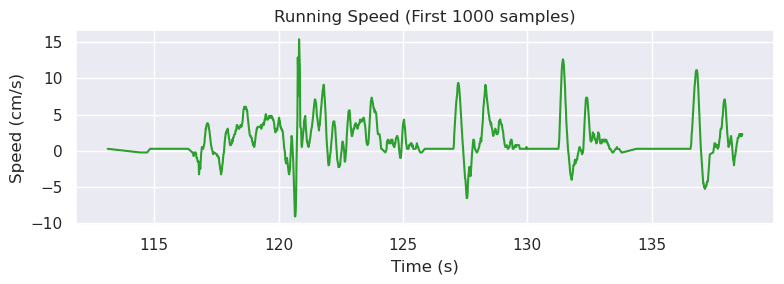

In [6]:
speed = nwb.processing['running'].data_interfaces['running_speed']
timestamps_speed = speed.timestamps[:1000]
data_speed = speed.data[:1000]

plt.figure(figsize=(8,3))
plt.plot(timestamps_speed, data_speed, color='tab:green')
plt.xlabel('Time (s)')
plt.ylabel('Speed (cm/s)')
plt.title('Running Speed (First 1000 samples)')
plt.tight_layout()
plt.show()

## Combined Visualization

Eye position colored by running speed

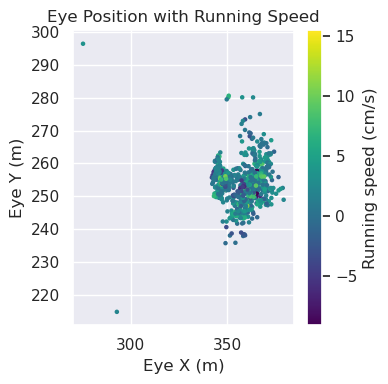

In [7]:
plt.figure(figsize=(4,4))
plt.scatter(data_eye[:,0], data_eye[:,1], c=data_speed, cmap='viridis', s=5)
cbar = plt.colorbar()
cbar.set_label('Running speed (cm/s)')
plt.xlabel('Eye X (m)')
plt.ylabel('Eye Y (m)')
plt.title('Eye Position with Running Speed')
plt.tight_layout()
plt.show()

## Summary and Future Directions

This notebook demonstrated how to:
- Load DANDI metadata and list assets  
- Load an NWB file remotely using PyNWB and `remfile`  
- Summarize the NWB file structure  
- Visualize key recorded and processed data  

Future analyses could include:
- Exploring LFP signals or spike trains from `nwb.units`  
- Analysis of stimulus-response intervals via `nwb.intervals`  
- Correlating behavioral metrics with neural data